# 2. Привлечение клиентов и классификация

In [1]:
# Как обычно, для начала подгружаем нужные нам пакеты
import pandas as pd    # пакет для работы с таблицами 
import numpy as np     # пакет для работы с матрицами 

# пакеты для картиночек 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

%matplotlib inline

from datetime import datetime # пакет для работы с датами 
# остальные пакеты подгрузим по мере необходимости

## 2.1 Постановка задачи и выбор метрик

В наших руках оказались [данные со статистикой скачки мобильных приложений из Appstore.](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) Предположим, что мы хотим запилить своё приложение и заработать на нём денег. Чтобы монетизировать приложение, нам нужно много пользователей. Возникает задача их привлечения и последущего удержания.

Для того, чтобы наше приложение привлекло много пользователей, хочется, чтобы у него были высокие рейтинги. В этой тетрадке мы попробуем обучить модель, которая будет предсказывать рейтинг приложения по его параметрам. 

Наш набор данных содержит более $7000$ наблюдений о мобильных приложениях под IOS. На основе этих данных можно посмотреть какими характеристиками должно обладать приложение, привлекающее людей и сделать своё приложение так, чтобы его рейтинги были максимально возможными. 

Целевой переменной для данной задачи будет рейтинг приложения. Нам хотелось бы, чтобы рейтинг нашего приложения был как можно выше. Будем считать, что нас устроит рейтинг $>4$. Разделим все приложения на хорошие и плохие и будем решать задачу классификации. Конечно можно было бы решать и задачу регрессии, но нам не нужна излишняя детализация. Какая разница, оценка у нашего приложени $2.6$ или $2.7$? Главное, что оно не привлекает пользователя.

В этот раз перед нами задача обучения с учителем. Мы уже как-то раз говорили с вами о метриках классификации. Через один семинар мы как следует вспомним их и порешаем ручных задач, чтобы получше разобраться в том, как они устроены. Сейчас мы сакцентируем внимание немного на других вещах: непосредственно на алгоритмах классификации и на кросс-валидации. 

В качестве метрики качества модели мы будем использовать ROC-AUC. Если вы помните, она принимает значение на отрезки от $0.5$ до $1$. Чем больше ROC-AUC, тем лучше наша модель. 

## 2.2 Данные? Какие данные? 

__Описание переменных:__

* `id` - идентификатор приложения;
* `track_name` - название приложения;
* `size_bytes` - размер приложения в байтах;
* `currency` - тип валюты, в которой платят за приложение;
* `price` - цена приложения;
* `rating_count_tot` - число проголосовавших юзеров;
* `rating_count_ver` - число проголосовавших юзеров (для текущей версии приложения);
* `user_rating` - среднее значение рейтинга для всех версий;
* `user_rating_ver` - среднее значение рейтинга для текущей версии;
* `ver` - код последней версии;
* `cont_rating` - возрастные ограничения;
* `prime_genre` - жанр;
* `sup_devices.num` - число поддерживающих устройств;
* `ipadSc_urls.num` - число скриншотов с примерами;
* `lang.num` - число поддерживаемых языков;
* `vpp_lic` - есть ли лицензия VPP;
* `app_desc` - описание приложения. 

Подгружаем данные! 

In [2]:
df = pd.read_csv('apple.csv', sep = '\t')
print(df.shape)
df.head()

(7197, 17)


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [3]:
df.info() # посмотрим на то, с какими переменными мы имеем дело 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
app_desc            7197 non-null object
dtypes: float64(3), int64(8), object(6)
memory usage: 955.9+ KB


## 3.3 Предобработка данных

Будем идти по классической схеме. 

* Анализ пропусков
* Варка новых переменных
* Обработка категориальных переменных (OHE)
* Дробление выборки на обучение и тест 
* Скалирование непрерывных переменных 

Смотрим на пропуски. Возрадуемся! Пропусков нет. 

In [4]:
df.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
app_desc            0
dtype: int64

Аккуратно поработаем с каждой переменной. Для начала сварим целевую переменную. Мы хотим научиться искать хорошие приложения с высоким рейтингом. У нас в загашниках завалялось несколько связанных с популярностью колонок:

* `rating_count_tot` - число проголосовавших юзеров;
* `rating_count_ver` - число проголосовавших юзеров (для текущей версии приложения);
* `user_rating` - среднее значение рейтинга для всех версий;
* `user_rating_ver` - среднее значение рейтинга для текущей версии;

Посмотрим на их распредения. 

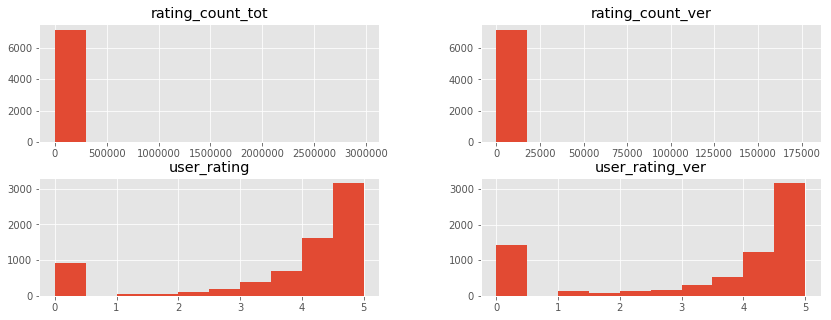

In [5]:
df[['rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver']].hist(figsize = (14,5))
plt.show( )

Из-за приложений-выбросов, не очень хорошо видно как распределено число людей, оценивших приложение. Срежем выбросы и построим гистограмму ещё раз. 

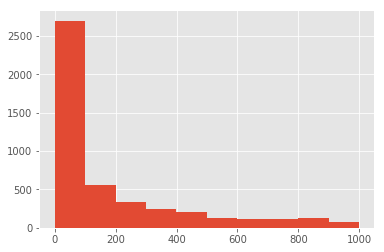

In [6]:
df[df['rating_count_tot'] < 1000]['rating_count_tot'].hist()

Выясняется, что средние оценки бывают разные. Есть оценки, усреднённые по маленькому числу пользователей, есть усреднённые по большому числу пользователей. Это зависит от срока жизни приложения.

* Если мы только-только выпустили своё приложение на рынок, у него ещё мало оценок, и мы должны по небольшому числу пользователей добиться высоких рейтингов. Это вопрос про привлечение новых пользователей к нашему приложению.
* Если мы выпустили приложение уже давно, перед нами стоит задача удержать пользователей.

Попробуем обучить две модели: модель, которая будет предсказывать популярность приложения при малом числе оценок, и модель, которая будет делать это при большом числе оценок. Интересно будет посмотреть насколько сильно будут различаться между собой факторы, из которых складывается популярность приложения на ранних и более поздних этапах.

Договоримся, что к первой ситуации относятся приложения, получившие менее $200$ оценок. Ко второй ситуации относятся приложения, получившие более $200$ оценок. Напомню, что мы обуcловились считать приложение, получившее больше $4$ звёзд - успешным. На основе этих тезисов сварим две выборки. 

In [7]:
# техническая переменная, которая говорит к какой выборке относится переменная
df['is_small'] = df['rating_count_tot'] <= 200 

# целевая переменная
df['is_success'] = df['user_rating'] >=4

Посотрим насколько сильно различается распределение оценок на большом и маленьком числе пользователей. 

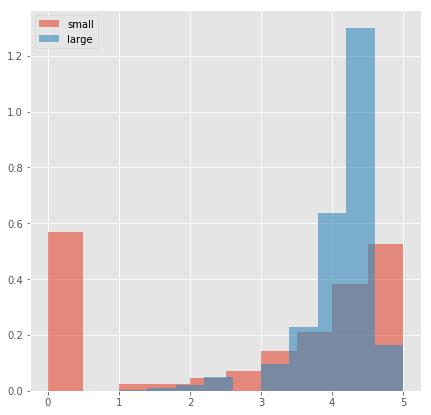

In [8]:
plt.figure(figsize=(7, 7))
plt.hist(df[df['is_small'] == True]['user_rating'], alpha = 0.6, normed=True, label="small")
plt.hist(df[df['is_small'] == False]['user_rating'], alpha = 0.6, normed=True, label="large")
plt.legend()
plt.show()

Различается. Видно, что многие приложения не взлетают и довольно быстро умирают, не сумев набрать критическую массу юзеров. В то же время, многие взлетевшие приложения продолжают лететь.

На переменные, отражающие успех текущей версии не будем обращать внимание. Наша выборка собрана за какой-то один конкретный момент времени. Если бы у нас было бы несколько выборок (например если бы мы собрали одну весной, другую осенью), мы бы могли бы посмотреть на то, как популярность меняется от версии к версии. 

Займёмся объясняющими переменными. Вытащим в отдельный список все действительные переменные и посмотрим на их распределения.


* `size_bytes` - размер приложения в байтах;
* `price` - цена приложения;
* `sup_devices.num` - число поддерживающих устройств;
* `ipadSc_urls.num` - число скриншотов с примерами;
* `lang.num` - число поддерживаемых языков;


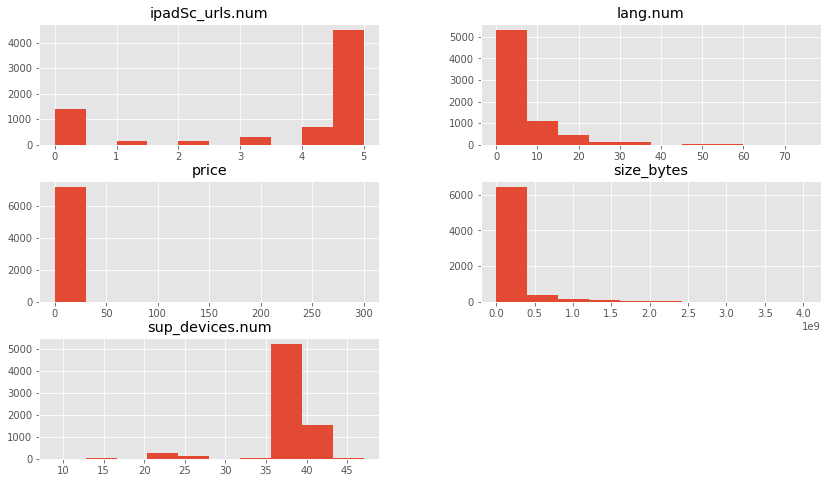

In [9]:
var_real = ['lang.num','ipadSc_urls.num', 'sup_devices.num', 'price', 'size_bytes']

df[var_real].hist(figsize = (14,8))
plt.show()

Видно, что в ряде переменых есть выбросы. Также видно, что переменные измерены в совершенно разных шкалах. Так, число языков, на которые переведено приложение, не выходет за $70$, в то время как вес приложения измеряется в байтах и пробивает $10^9$. Чтобы модель хорошо обучилось, нам придётся в будущем проскалировать переменные. 

Для удобства создадим список категориальных переменных. Построим картинку, на которой можно будет разглядеть как много какой категории у нас есть и какой влияние она оказывает на качество приложения. 

* `currency` - тип валюты, в которой платят за приложение;
* `cont_rating` - возрастные ограничения;
* `prime_genre` - жанр;
* `vpp_lic` - есть ли лицензия VPP;

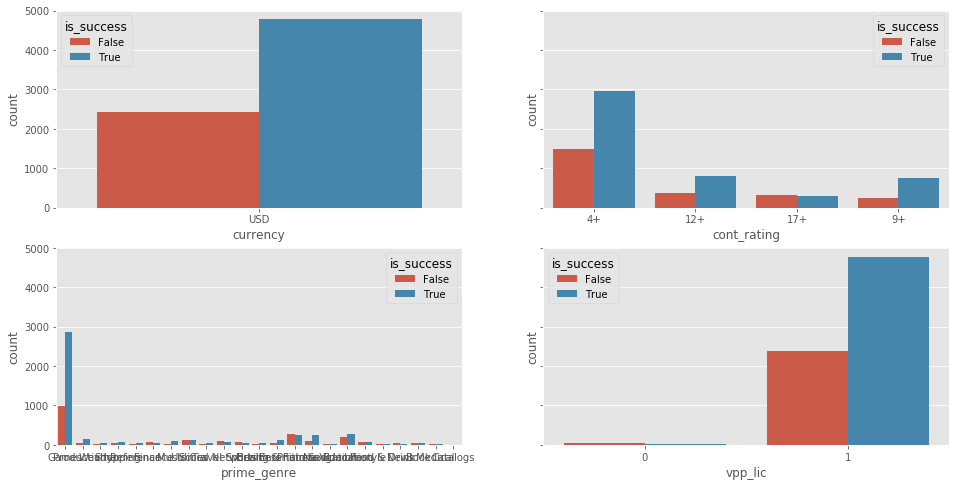

In [10]:
var_cat = ['currency', 'cont_rating', 'prime_genre', 'vpp_lic']

fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharey=True)
for i in range(len(var_cat)):
    sns.countplot(x=var_cat[i], data=df, hue='is_success',ax=axes[i // 2, i % 2])

Последние незадействованные в нашем визульном анализе переменные - это имя приложения и его описание. Это текст, который сложно переработать в какие-то категории. Давайте пока что введём две действительные переменные: длина описания и длина названия, и на этом остановимся. Позже, когда мы будем пытаться повысить качество модели, мы вернёмся к этим переменным и вспомним про tf-idf, который мы рассматривали на прошлом семинаре.

In [11]:
df['name_len'] = df['track_name'].apply(lambda w: len(w))
df['desc_len'] = df['app_desc'].apply(lambda w: len(w))

# пополним список действительных переменных
var_real = var_real + ['name_len', 'desc_len']

Мы почти готовы к моделированию. Раздробим выборку на две по числу моделей и оставим только интересующие нас переменные. 

In [12]:
df_small = df[df['is_small'] == True][var_real + var_cat + ['is_success']]
df_large = df[df['is_small'] == False][var_real + var_cat + ['is_success']]

df_small.shape, df_large.shape

((3263, 12), (3934, 12))

Посмотрим на распределние успехов и неудач в обеих выборках.

In [13]:
df_small.is_success.value_counts()

False    1783
True     1480
Name: is_success, dtype: int64

In [14]:
df_large.is_success.value_counts()

True     3301
False     633
Name: is_success, dtype: int64

В большой выборке есть перекос в успешную сторону. Если мы прорвались в высшую лигу, скатиться сложнее. Это логично. Делаем OHE-кодирование.

In [15]:
df_small = pd.get_dummies(df_small)
df_large = pd.get_dummies(df_large)

df_small.shape, df_large.shape

((3263, 37), (3934, 37))

Дробим выборку на тестовую и тренировочную. 

In [16]:
from sklearn.model_selection import train_test_split  # функция для деления 

# делим в пропорции 70 к 30
df_strain, df_stest = train_test_split(df_small, test_size = 0.3, stratify = df_small['is_success']) 
df_ltrain, df_ltest = train_test_split(df_large, test_size = 0.3, stratify = df_large['is_success']) 

Последний предобрабатывательский штрих - скалируем действительные переменные. 

In [17]:
from sklearn.preprocessing import StandardScaler  # класс для скалирования
# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(df_strain[var_real]) 

# Применяем скалировщик к трэйну
df_strain_scale = scaler.transform(df_strain[var_real])
df_strain[var_real] = df_strain_scale

# Применяем скалирвощик к тесту 
df_stest_scale = scaler.transform(df_stest[var_real])
df_stest[var_real] = df_stest_scale

# то же самое для второй выборки
scaler.fit(df_ltrain[var_real]) 

# Применяем скалировщик к трэйну
df_ltrain_scale = scaler.transform(df_ltrain[var_real])
df_ltrain[var_real] = df_ltrain_scale

# Применяем скалирвощик к тесту 
df_ltest_scale = scaler.transform(df_ltest[var_real])
df_ltest[var_real] = df_ltest_scale


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Для удобства раскидаем всё по векторам да матрицам. 

In [18]:
# для удобства запишем в y то, что мы хотим спрогнозировать, а в X то, по чему мы это будем делать.
y_strain = df_strain['is_success']
y_stest = df_stest['is_success']

X_strain = df_strain.drop(['is_success'], axis=1).get_values()
X_stest = df_stest.drop(['is_success'], axis=1).get_values()

y_ltrain = df_ltrain['is_success']
y_ltest = df_ltest['is_success']

X_ltrain = df_ltrain.drop(['is_success'], axis=1).get_values()
X_ltest = df_ltest.drop(['is_success'], axis=1).get_values()

## 3.4 Моделируем привлечение клиентов

Наконец-то мы дорвались до моделирования! На лекции мы посмотрели на два метода: метод ближайших соседей и решающие деревья aka случайный лес. Именно их мы и попробуем использовать для обучения. Для оценки качества работы алгоритма мы будем использовать ROC-AUC. 

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve  # подгрузили метрики

# Функция для отрисовки roc-auc кривой
# В её коде разбираться не обязательно.

def roc_auc_pic(model, y_train, y_test, X_train, X_test):
    y_hat_train = model.predict_proba(X_train)[:,1]
    y_hat_test = model.predict_proba(X_test)[:,1]
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_hat_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
    roc_auc_train = roc_auc_score(y_train, y_hat_train)
    roc_auc_test = roc_auc_score(y_test, y_hat_test)

    matplotlib.rcParams['figure.figsize'] = (8, 8)
    plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()  
    pass

### 3.4.1 Метод ближайших соседей

Метод ближайших соседей - это простейший алгоритм машинного обучения. Напомню, он заключается в том, что мы ищем тех, кто сильнее всего похож на наш объект и приписываем ему тот же класс. Попробуем обучить метод одиннадцати ближайших соседей.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=11)
clf_knn.fit(X_strain, y_strain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [21]:
# прогнозы
y_predicted = clf_knn.predict(X_stest)
y_predicted[:10]

array([False, False, False,  True, False,  True,  True,  True,  True,
        True])

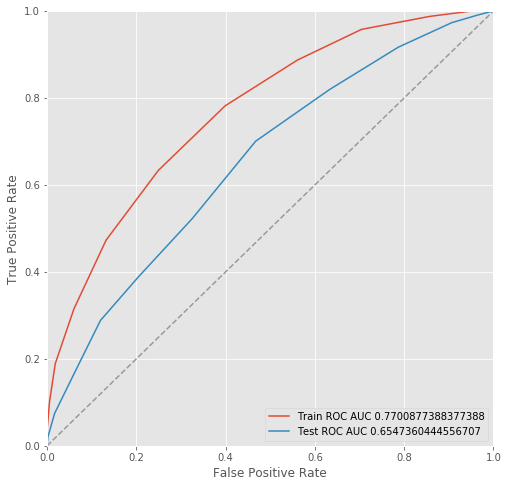

In [22]:
roc_auc_pic(clf_knn, y_strain, y_stest, X_strain, X_stest)

Чем больше площадь под кривой, тем качественнее классификатор. Значение AUC=0.5 говорит о непригодности модели, это равносильно случайному гаданию. Как можно заметить, у нашей модели есть средненькая прогнозная сила.

### 3.4.2 Одинокий дуб 

In [23]:
from sklearn.tree import DecisionTreeClassifier # подгрузили дерево

clf_trees = DecisionTreeClassifier()       # объявили дерево
clf_trees.fit(X_strain, y_strain)           # научили дерево

y_predicted = clf_trees.predict(X_stest)   # предсказали метки класса
y_proba = clf_trees.predict_proba(X_stest) # предсказали вероястности

print(y_predicted[:5])
print(y_proba[:5])

[ True False False  True False]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


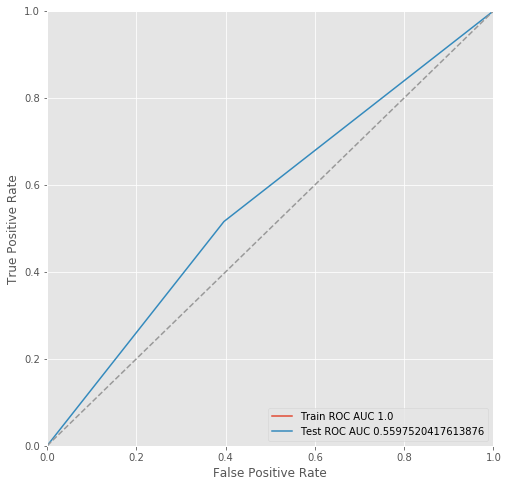

In [24]:
roc_auc_pic(clf_trees, y_strain, y_stest, X_strain, X_stest)

А где трэйновый рок-аук? А нет трэйнового рок-аука! Он слился с границей графика. Площадь под тренировочной кривой равна единице. Все вероятности выродились в нули и единицы. Дерево идеально вылизало выборку и переобучилось.

Одно дерево обладает важным недостатком: оно очень сильно фрагментирует выборку. Иначе говоря, запоминает её и переобучается. Чтобы избавиться от этой проблемы, обычно выращивают много деревьев: лес. Взращивая лес, деревья стараются сделать максимально независимыми друг от друга. Это позволит каждому из них фрагментировать выборку по-своему и в среднем не переобучиться. 

Если мы обучим лес на сотне деревьев, мы заметим, что качество нашей модели подросло. Чтобы ещё сильнее улучшить качество леса, можно зафитить его отдельные параметры: число деревьев, минимальное число объектов в листе и тп.

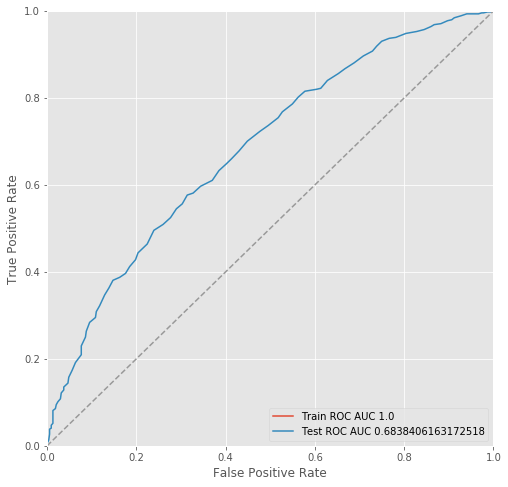

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(n_estimators=100) # число деревьев в лесе
rfs.fit(X_strain, y_strain)

roc_auc_pic(rfs, y_strain, y_stest, X_strain, X_stest)

Обратите внимание, что рок-аук на трэйне снова вылетел за пределы картинки. Для случайного леса это не свидетельствует о переобучении. Он не переобучается. Чтобы более чётко осознать это, нужно залезть под капот алгоритма.

Давайте посмотрим на то, какие фичи оказались для случайного леса самыми важными. Мы можем на каждом решающем дереве из леса посмотреть насколько сильно какая из переменных уменьшала ошибку при разбиении. Чем сильнее она это сделала, тем она важнее. После мы усредним важность по всем деревьям и получи окончательный результат.

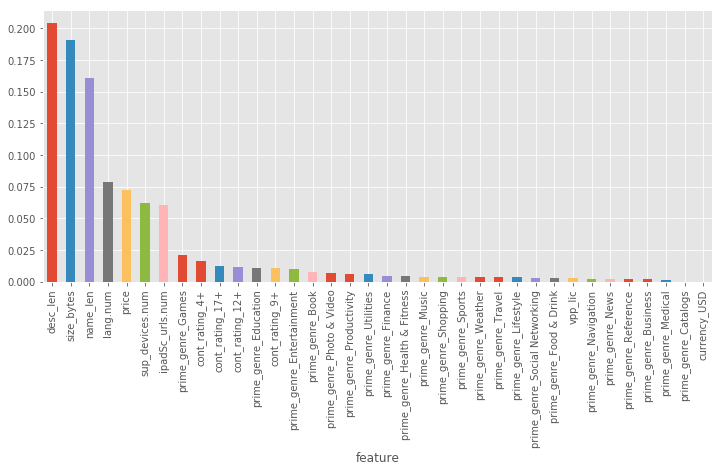

In [26]:
featureImportance = pd.DataFrame({"feature": df_small.drop('is_success',axis=1).columns, 
                                  "importance": rfs.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(12,5))

## 3.5 Моделируем удержание клиентов

Проделаем ровно те же самые манипуляции со второй выборкой и посмотрим насколько хорошо мы сможем педсказать популярность приложения-старожила. 

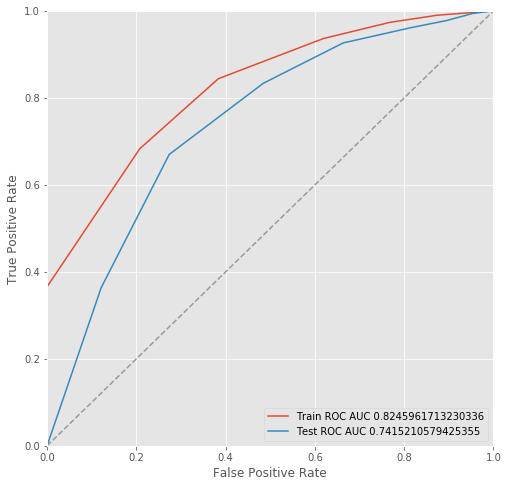

In [27]:
clf_knnl = KNeighborsClassifier(n_neighbors=11)
clf_knnl.fit(X_ltrain, y_ltrain)

roc_auc_pic(clf_knnl, y_ltrain, y_ltest, X_ltrain, X_ltest)

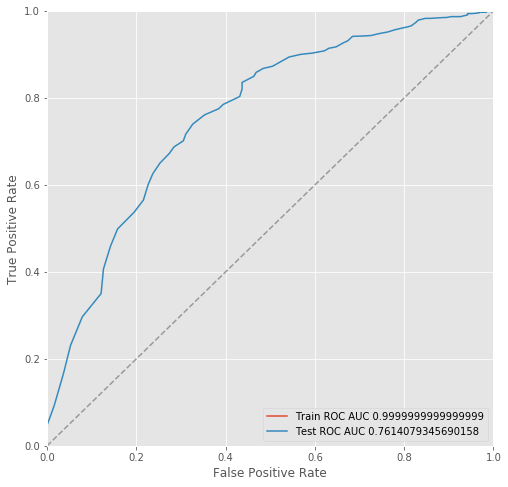

In [28]:
rfl = RandomForestClassifier(n_estimators=100) # число деревьев в лесе
rfl.fit(X_ltrain, y_ltrain)

roc_auc_pic(rfl, y_ltrain, y_ltest, X_ltrain, X_ltest)

Предсказать старожилов удаётся получше. Теперь давайте сделаем то, ради чего это всё затевалось: сравним факторы, которые обеспечивают приложению высокие рейтинги на начальных этапах его развития и в более зрелом возрасте.

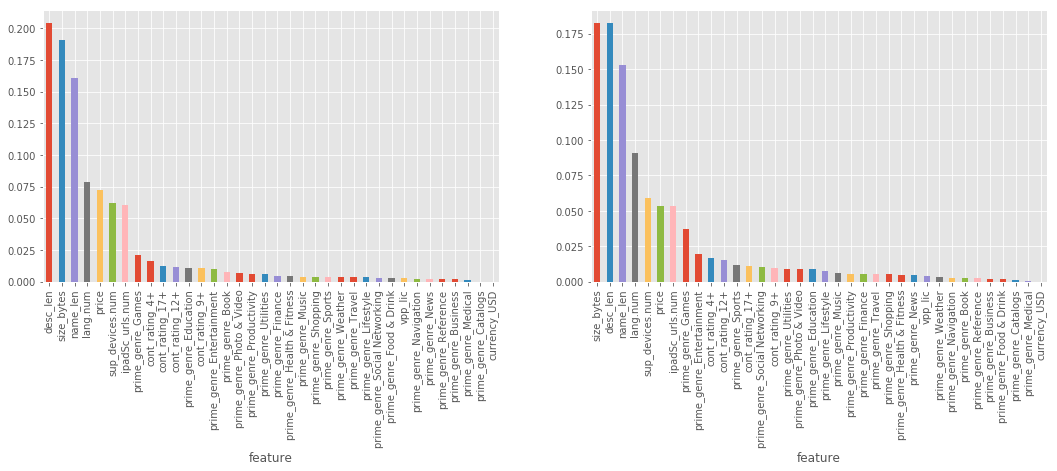

In [29]:
featureImportance = pd.DataFrame({"feature": df_small.drop('is_success',axis=1).columns, 
                                  "importance": rfs.feature_importances_})

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')



featureImportance = pd.DataFrame({"feature": df_large.drop('is_success',axis=1).columns, 
                                  "importance": rfl.feature_importances_})

plt.subplot(1,2,2)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

Особой разницы в факторах нет. Они лишь меняются местами, но это, скорее всего, происходит в рамках статистической погрешности. 

__Плюс случайного леса:__ нелинейная модель, которая строит хорошие прогнозы. 

__Минус случайного леса:__ мы не можем проинтерпретировать его. Мы даже не можем сказать какие фичи влияют на популярность приложения положительно, а какие отрицательно. 

Давайте попробуем обучить логистическую регрессию. Она линейна, и из-за этого её качество прогнозов обычно оказывается хуже, но она интерпретируема. Из-за этого она обычно очень популярна на практике. 

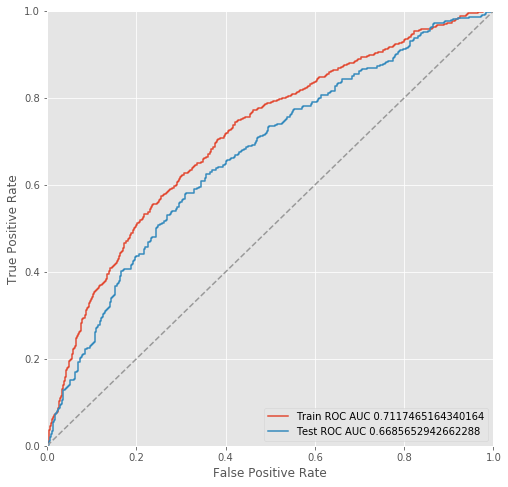

In [30]:
from sklearn.linear_model import LogisticRegression

lrs = LogisticRegression( ) 
lrs.fit(X_strain, y_strain)

roc_auc_pic(lrs, y_strain, y_stest, X_strain, X_stest)

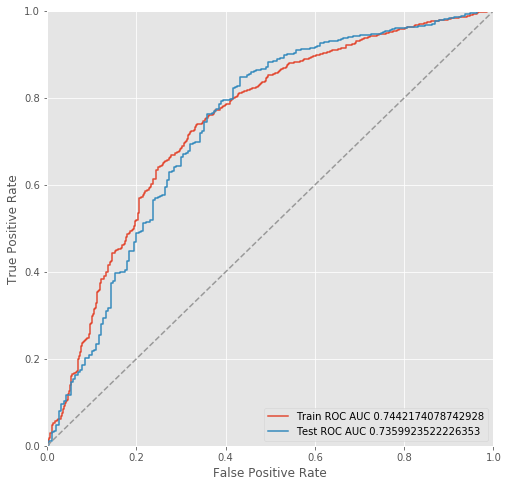

In [31]:
lrl = LogisticRegression( )  
lrl.fit(X_ltrain, y_ltrain)

roc_auc_pic(lrl, y_ltrain, y_ltest, X_ltrain, X_ltest)

Что приятно, мы не переобучились. Тестовый и трэйновый рок-аук находятся примерно на одном уровне. Посмотрим на вклад различных факторов в успешность приложения.

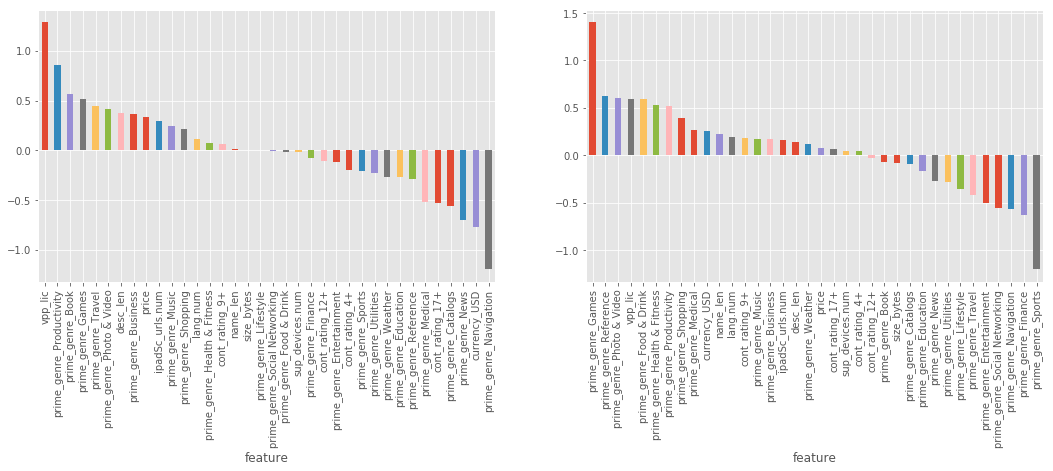

In [32]:
featureImportance = pd.DataFrame({"feature": df_small.drop('is_success',axis=1).columns, 
                                  "importance": lrs.coef_[0]})

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')



featureImportance = pd.DataFrame({"feature": df_large.drop('is_success',axis=1).columns, 
                                  "importance": lrl.coef_[0]})

plt.subplot(1,2,2)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

Сейчас будет сложновато, но попытайтесь въехать. Видно какие переменные оказали положительное влияние какие отрицательное. В логистическое регрессии мы пытаемся предсказать вероятность успешности, $P(y=1)$ приложения по его параметрам. Отношение  $\frac{P(y=1)}{P(y=0)}$ теории вероятностей называют шансами. Например, если вероятность инфаркта равна $1/3$, шансы схватить его оцениваются как один к двум:

$$\frac{1/3}{2/3} = \frac{1}{2}$$

На этом понятии строися интерпретация логистической регрессии. Например, у переменной `prime_genre_Travel` в первой модели коэффициент окзазался в районе $0.75$. Это означает, что если приложение относится к категории приложений для путешествий, __логарифм отношения шансов возрастает на 0.75__. То есть вероятность того, что приложение окажется успешным подскакивает. Обратите внимание, что на популярность приложения в долгосрочном периоду эта переменная влияет отрицательно.

В факторах, которые оказывают влияние на популярность приложения на разных этапах его развития наблюдается некоторая разница. Видно, каким параметрам приложения нужно уделить внимание в первую очередь. Давайте немного позалипаем в эту картинку и попробуем пофантазировать почему дела обстоят именно так.

Думаете, что ML закончился??? Камон, он только начинается! Пришло время задания! 

## Акт 1 :  замечательный сосед становится соседями.

1. Попробуйте обучить метод одного ближайшего соседа. Что произошло с качеством модели? Как называется такая ситуация? Проинтерпретируйте её.
2. Давайте попробуем перебрать соседей и узнать какое количество будет давать самое крутое значение ROC-AUC. Попробуйте сделать это с помощью цикла. Нарисуйте график, где по оси $x$ будет отложено число соседей, а по оси $y$ значение ROC-AUC на тестовой выборке. Что значит не знаете как? В прошлом курсе разбирали!
3. Можно ли после этой процедуры использовать тестовую выборку для проверки качества модели? Почему? Каким умным словом называется число соседей? 

In [40]:
# ваш код 

98

Конечно же, после такой процедуры поиска оптимального параметра $k$, тестовую выборку нельзя использовать для проверки качества модели. Мы с помощью неё подобрали гиперпараметр $k$. Она поучаствовала в обучении. Обычно такую выборку, на которой подбирают гиперпараметры, называют валидационной. 

Если мы хотим обучить модель, подобрать для неё гиперпараметры и проверить её качество,  нужно дробить выборку на три части: тренировочную, валидационную и тестовую. 

## Акт 2:  в лесу появляется санитар

Нашли оптимальное число соседей? Пришло время немного поухаживать за случайным лесом. Дело в то, что сам по себе алгоритм случайного леса предполагает довольно большое количество эвристик, предназначенных для борьбы с переобучением. Эти эвристики порождают много параметров, которые можно было бы поперебирать.

Найти оптимальное число соседей можно было бы без цикла с помощью следущего кода: 

In [41]:
from sklearn.model_selection import GridSearchCV  # класс для перебора

# задаём решётку из параметров, которые нужно перебрать 
parameters = {'n_neighbors' : range(1, 100)}  

# задаём модель, для которой надо перебирать параметры
knc = KNeighborsClassifier()

# задаём переборщик параметров над моделью, решёткой и метрикой
clf = GridSearchCV(knc, parameters, scoring='roc_auc')

# учим 
clf.fit(X_strain, y_strain)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

На выходе получаем другой результат. Как думаете, почему это произошло? 

__Ответ:__    ??? 


Есть и другие подходы к кросс-валидации, например, можно откидывать по одному наблюдению, учить модель на оставшейся части, и на этом наблюдении тестировать модель. Такой подход называется leave one out. Именно его мы с вами смотрели на примере муравьев, когда решали задачки руками. 

Давайте попробуем перебрать число деревьев в лесу `n_estomators` `[10,20,50,70,100,120]`  и минимальное число объектов в листьях 'min_samples_leaf' `[1, 3, 5, 7, 10, 15]`. У класса `GridSearchCV` есть параметр `cv`. Он отвечает за то, на сколько блоков дробить выборку. Поставьте `cv=5`. Также поставьте параметр `njobs = -1`. Это распаралелит работу кода на все ядра компьютера.

In [34]:
# ваш код

Оптимальное значения параметров находится недалеко от выбранных нами: `n_estimators=70`, `min_samples_leaf=1`. Вспомните какие ещё параметры для леса можно перебрать. Посмотрите [в документации](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) как они называются и переберите. Но это уже домашнее задание. 

## Акт 3:  Тук-тук.  Кто там?  Кластеризация.

При варке фичей мы сказали, что практически никак не будем использовать текстовую информацию при моделировании. Давайте исправим эту ситуацию. На прошлом семинаре мы занимались кластеризацией на текстовых данных. Давайте попробуем задействовать её для того, чтобы улучшить качество модели. 

1. Возьмите описания приложений. Преобразуйте их в tf-idf матрицу. Установите параметры `min_df=0.01` и `max_df=0.3`.
2. Методом k-means разбейте все описания на $10$ кластеров.
3. Создайте категориальную переменную: отношение к конкретному кластеру. Сделайте OHE. 
4. Обучите модели на новой выборке. Получилось ли улучшить качество моделей? 

Шаг первый: tf-idf. Делаем его как в предыдущем семинаре. 

In [35]:
# ваш код 

Шаг второй: обучаем k-means и добавляем в таблицу с переменными новую фичу: номер сегмента, к которому относится наше приложение. Делаем всю соответствующую предобработку, дробим выборку на трэйн и тест.

In [36]:
# ваш код

Обучаем случайный лес на новой выборке.

In [37]:
# ваш код

Как изменилось качество модели?